In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [38]:
df = pd.read_csv('Downloads/liver.csv')

In [39]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [40]:
df.shape

(583, 11)

In [41]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [42]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [43]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [44]:
df.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

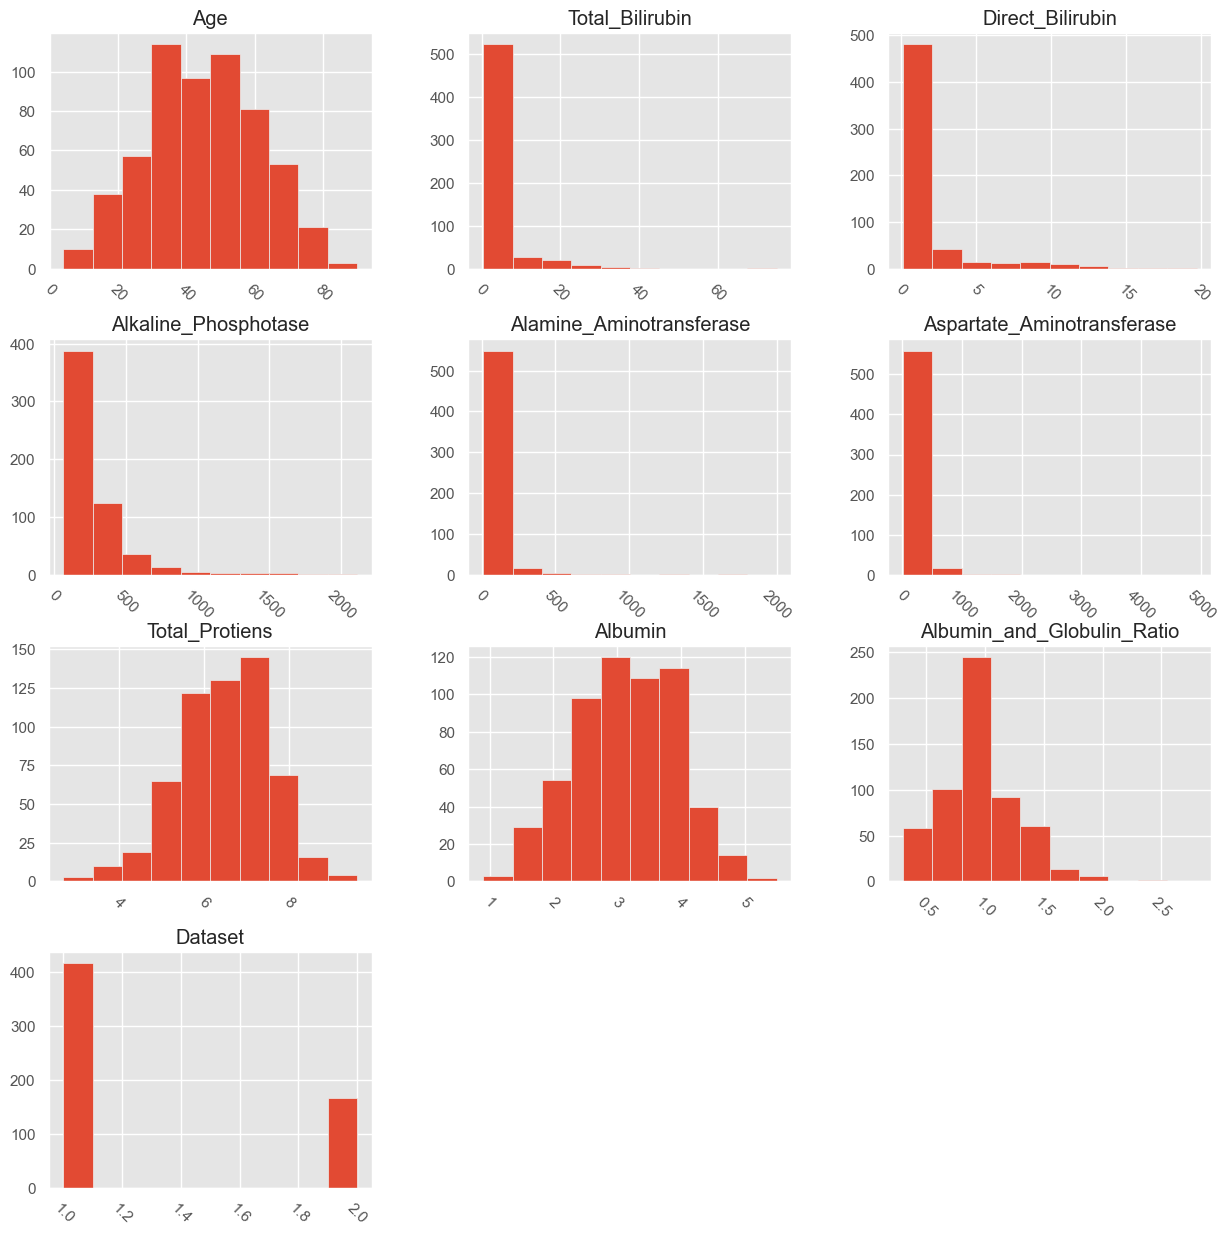

In [45]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [11]:
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [46]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
df['Dataset'] = df['Dataset'].map(convertdataset)

In [47]:
df.Dataset.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [48]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<Axes: xlabel='count', ylabel='Gender'>

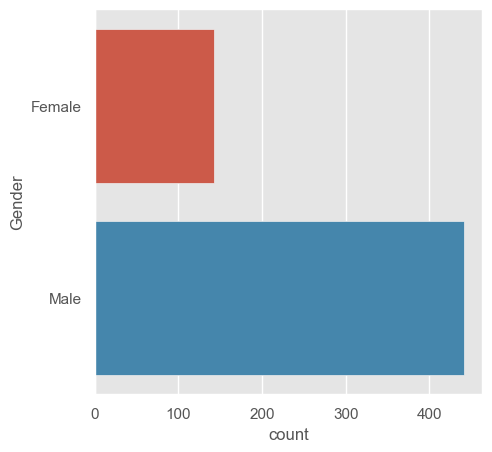

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [50]:
df[df['Gender'] == 'Male'][['Dataset','Gender']].head()


,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


In [51]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
df['Gender'] = df['Gender'].map(convertgender)

In [52]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

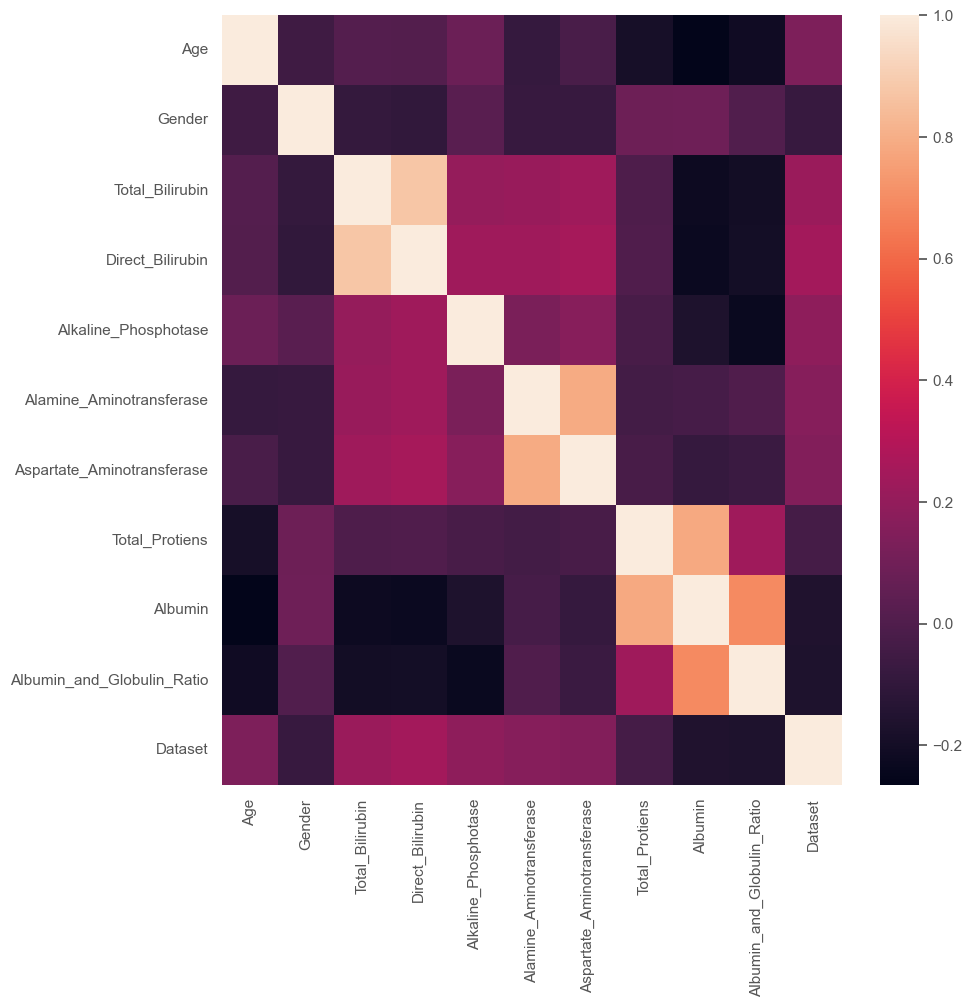

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

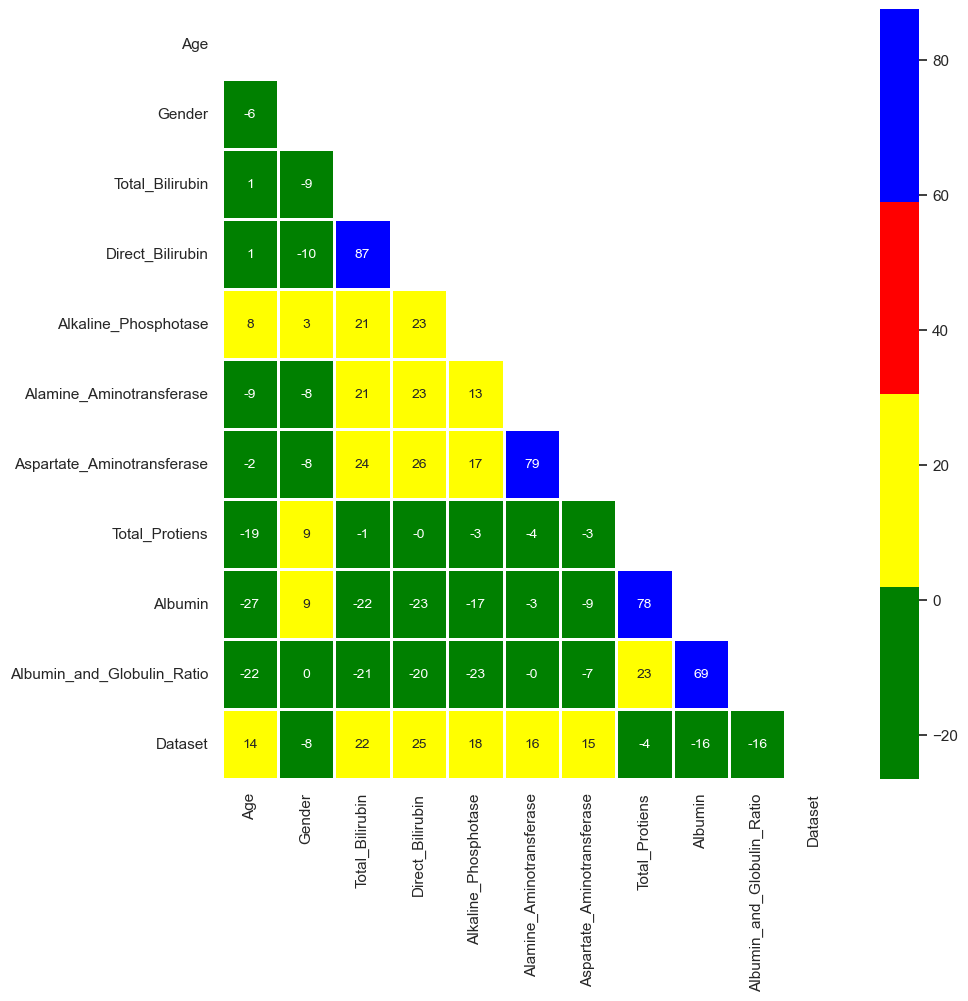

In [53]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

In [21]:
df = df.drop_duplicates()

In [22]:
df.shape

(570, 11)

<Axes: >

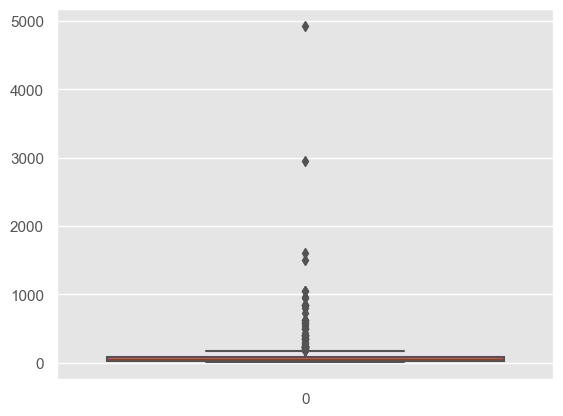

In [23]:
sns.boxplot(df.Aspartate_Aminotransferase)

<Axes: >

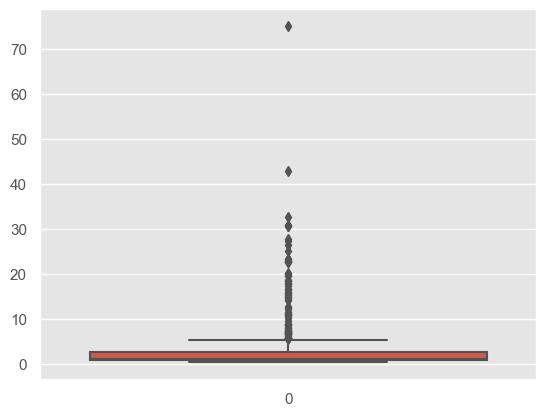

In [24]:
sns.boxplot(df.Total_Bilirubin)

In [25]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [26]:
df = df[df.Aspartate_Aminotransferase<=3000]

In [27]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:
df = df[df.Aspartate_Aminotransferase<=2500]

In [29]:
df.shape

(568, 11)

In [30]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [31]:
df = df.dropna(how='any')

In [35]:
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [36]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [34]:
pd.set_option('display.max_rows', None)

In [34]:
df.shape


(564, 11)

In [35]:
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [37]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [38]:
train_mean = X_train.mean()
train_std = X_train.std()

In [39]:
X_train = (X_train - train_mean) / train_std

In [40]:
X_test = (X_test - train_mean) / train_std

In [41]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Training score :',model.score(X_train,y_train))
    print('Test score :',model.score(X_test,y_test))
    print('Confusion Matrix :' ,'\n',confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')
    print('Classification report :' ,'\n',classification_report(y_test, preds))

In [42]:
lr = LogisticRegression()
score(lr,'Logistic Regression')

Training score : 0.7117516629711752
Test score : 0.7699115044247787
Confusion Matrix : 
 [[11 21]
 [ 5 76]]
Accuracy for Logistic Regression : 0.76991 

Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.78      0.94      0.85        81

    accuracy                           0.77       113
   macro avg       0.74      0.64      0.66       113
weighted avg       0.76      0.77      0.74       113



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
score(knn,'KNeighborsClassifier')

Training score : 0.811529933481153
Test score : 0.6637168141592921
Confusion Matrix : 
 [[16 16]
 [22 59]]
Accuracy for KNeighborsClassifier : 0.66372 

Classification report : 
               precision    recall  f1-score   support

           0       0.42      0.50      0.46        32
           1       0.79      0.73      0.76        81

    accuracy                           0.66       113
   macro avg       0.60      0.61      0.61       113
weighted avg       0.68      0.66      0.67       113



In [44]:
svc= SVC(probability=True)
parameters = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [45]:
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [46]:
grid_search.best_score_

0.7117460317460318

In [47]:
svc= SVC(C=0.01, gamma=0.0001,probability=True)

In [48]:
score(svc,'SVC')

Training score : 0.7117516629711752
Test score : 0.7168141592920354
Confusion Matrix : 
 [[ 0 32]
 [ 0 81]]
Accuracy for SVC : 0.71681 

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [49]:
dtc = DecisionTreeClassifier()
score(dtc,'DecisionTreeClassifier')

Training score : 1.0
Test score : 0.6460176991150443
Confusion Matrix : 
 [[17 15]
 [25 56]]
Accuracy for DecisionTreeClassifier : 0.64602 

Classification report : 
               precision    recall  f1-score   support

           0       0.40      0.53      0.46        32
           1       0.79      0.69      0.74        81

    accuracy                           0.65       113
   macro avg       0.60      0.61      0.60       113
weighted avg       0.68      0.65      0.66       113



In [50]:
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,12,15],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_seach_dt = GridSearchCV(dtc, grid_parameter, cv=24, n_jobs=-1, verbose=1)
grid_seach_dt.fit(X_train, y_train)

Fitting 24 folds for each of 1800 candidates, totalling 43200 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [51]:
grid_seach_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [52]:
grid_seach_dt.best_score_

0.7273391812865496

In [53]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', min_samples_leaf=7, min_samples_split=3, splitter='best')

In [54]:
score(dtc,'DTC')

Training score : 0.7405764966740577
Test score : 0.6371681415929203
Confusion Matrix : 
 [[12 20]
 [21 60]]
Accuracy for DTC : 0.63717 

Classification report : 
               precision    recall  f1-score   support

           0       0.36      0.38      0.37        32
           1       0.75      0.74      0.75        81

    accuracy                           0.64       113
   macro avg       0.56      0.56      0.56       113
weighted avg       0.64      0.64      0.64       113



In [55]:
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)


In [56]:
score(rand_clf,'Random Forest')

Training score : 0.9024390243902439
Test score : 0.7168141592920354
Confusion Matrix : 
 [[11 21]
 [11 70]]
Accuracy for Random Forest : 0.71681 

Classification report : 
               precision    recall  f1-score   support

           0       0.50      0.34      0.41        32
           1       0.77      0.86      0.81        81

    accuracy                           0.72       113
   macro avg       0.63      0.60      0.61       113
weighted avg       0.69      0.72      0.70       113



In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [58]:
grid_search_gbc.best_params_

{'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 100}

In [59]:
grid_search_gbc.best_score_

0.7120553359683793

In [60]:
gbc = GradientBoostingClassifier(learning_rate=0.001, loss='exponential',n_estimators=100)

In [61]:
score(gbc,'Gradient Boost')

Training score : 0.7117516629711752
Test score : 0.7168141592920354
Confusion Matrix : 
 [[ 0 32]
 [ 0 81]]
Accuracy for Gradient Boost : 0.71681 

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [62]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier(objective='binary:logistic', learning_rate = 0.001, max_depth = 100, n_estimators = 300)

In [64]:
score(xgb,'XGB Classifier')

Training score : 0.7117516629711752
Test score : 0.7168141592920354
Confusion Matrix : 
 [[ 0 32]
 [ 0 81]]
Accuracy for XGB Classifier : 0.71681 

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [65]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))

In [66]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifer', 'XgBoost'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4), 100*round(rand_clf_acc, 4), 100*round(gbc_acc, 4),100*round(xgb_acc, 4)]
})

In [67]:
models

,Model,Score
0,Logistic Regreesion,76.99
1,KNN,66.37
2,SVC,71.68
3,Decision Tree Classifier,63.72
4,Random Forest Classifier,71.68
5,Gradient Boosting Classifer,71.68
6,XgBoost,71.68


In [70]:
import pickle
model = lr
pickle.dump(model, open("liver.pkl","wb"))